# TP3: Density estimation
### Nicolas LASSO & Manuela ARDILA

All the comments and remarks are done on comments inside the code cells, or on markdown just after the graphs and executions



In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from tqdm import tqdm
from IPython.display import display, HTML


def reference(x): #la densité de référence à estimer
        return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)




#Question 1
#In the same script, define four functions K1, K2, K3, K4 corresponding
#respectively to the uniform, triangle, Epanechnikov and Gaussian kernels.

#Uniform Kernel
#K(x) = 1/2 if x<1 and x>-1 else 0
def K1(x):
    return np.where((x < 1) & (x > -1), 1/2, 0)

#Triangular kernel
#K(x) = 1-|x| if x<1 and x>-1 else 0
def K2(x):
    return np.where((x < 1) & (x > -1), 1-np.abs(x), 0)
    
        
#Epanechnikov kernel
#K(x) = 3/4(1-x^2) if x<1 and x>-1 else 0
def K3(x):
    return np.where((x < 1) & (x > -1), 3/4*(1-x**2), 0)
        
#Gaussian kernel
#K(x) = 1/(sqrt(2*pi))*exp(-x^2/2)
def K4(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

#how to import tqdm




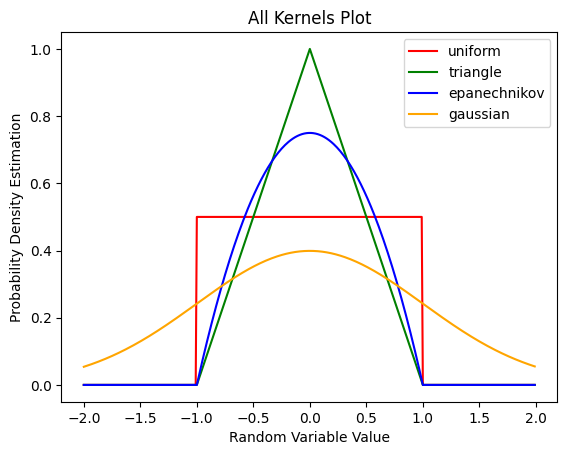

In [75]:


#Question 2

#Represent these four kernels on the same graph (use a legend and dif-
#ferent colors). Create a function to do this question that you will name
#AllplotK which will take as input the parameters of the graph (the step,
#xmin, xmax, the colors etc...) and will represent the graph in return.

def AllplotK(step,xmin,xmax,col1,col2,col3,col4):

            """
            Plot all kernels in the same graph
            step: step between each point
            xmin: minimum value of x
            xmax: maximum value of x
            colors: list of colors for each kernel
            """
            plt.title('All Kernels Plot')
            colors = [col1, col2, col3, col4]
            kernels = [K1, K2, K3, K4]
            legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
            x = np.arange(xmin, xmax, step)
            for i in range(len(kernels)):
                plt.plot(x, kernels[i](x), colors[i], label = legends[i])
                
            plt.legend()
            plt.xlabel('Random Variable Value')
            plt.ylabel('Probability Density Estimation')
            plt.show()
     


AllplotK(0.01,-2,2,'r','g','b','orange')


#P1-LASSOARDILAQ2.png 

In [76]:
#Question 3
#Generate a realization of the random sample X according to the standard
#Gaussian distribution of size n. (n is currently set to 100 in the script).
n=100
X= np.random.normal(0,1,n)

X

array([ 0.69932183,  0.28140228,  0.2021923 ,  2.12406996, -0.95303754,
        0.682991  , -0.77636062, -2.53116837,  1.252698  , -0.42545932,
        0.74767816,  1.14323549, -0.53245592, -0.44105262, -0.30292844,
        0.93780088,  0.95992026, -0.39277304,  0.09462509,  0.67300351,
       -0.46174159,  1.23986715, -0.8510512 , -0.87218264, -1.4105452 ,
        0.11759024,  1.90507204,  0.71182998, -0.02670889,  0.41223777,
       -0.08113557,  0.10038362,  0.08926984, -0.54193236, -0.41338704,
        0.09278237,  1.91753044,  0.0863938 , -0.64398362,  0.30180549,
       -1.87907389,  0.22435229, -0.44408025, -0.05924226, -1.20306449,
        0.10805735,  0.39466069, -0.01242777,  0.23721438,  0.17897665,
       -1.88467746, -0.36405975, -0.63093151,  0.14775607, -2.35159754,
       -1.19004468, -0.05083404,  2.14060294, -1.11970176,  0.06124332,
        0.3719485 ,  0.09961458,  0.64974914, -0.55315793,  0.46821531,
        1.63135053,  1.7576886 ,  0.89603121, -0.45965816, -0.96

In [77]:

#Question 4
#write a function fhat that Estimates the density f(here the standard Gaussian, for a window h, at the point x for the kernel func)
#if x is an array, the function will return an array of the same size appliying the function over each element of x

def fhat(kernel,h,x,sample):
    """
    Estimate the density f(here the standard Gaussian, for a window h, at the point x for the kernel func)
    if x is an array, the function will return an array of the same size appliying the function over each element of x
    """
    return (1/len(sample))*sum(((1/h)*kernel((x-sample)/h)))


print("Reference: ",reference(0))
print("Estimation: ",fhat(K1,2,0,X))


Reference:  0.3989422804014327
Estimation:  0.24


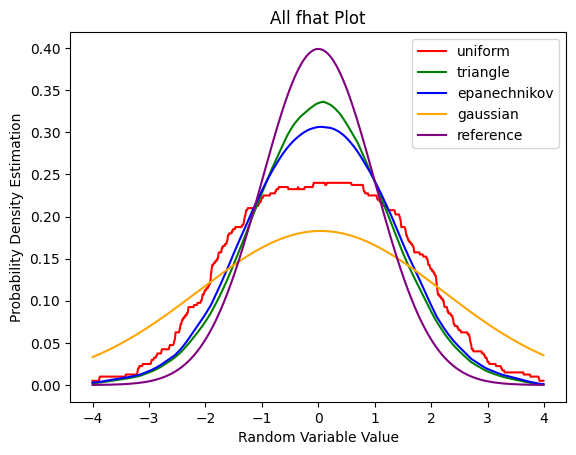

In [78]:
#Question 5
#Show on the same graph the reference function f and the four functions
#bfh obtained with the kernels K1, K2, K3, K4. You will add a legend and
#different colors to all the curves. We will fix for this question h = 2. You
#will define a function like in question 2 to do this question. This function
#will be named Allplotfhath2.

def Allplotfhath2(xmin,xmax,step,col1,col2,col3,col4,colref,realization=X,title='All fhat Plot'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        x = np.arange(xmin, xmax, step)
        fhats = [fhat(kernels[i],2,p,realization) for p in x]
        plt.plot(x, fhats, colors[i], label = legends[i])
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.legend()
    plt.xlabel('Random Variable Value')
    plt.ylabel('Probability Density Estimation')
    plt.show()

#P1-LASSOARDILAQ5.png 
Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple')


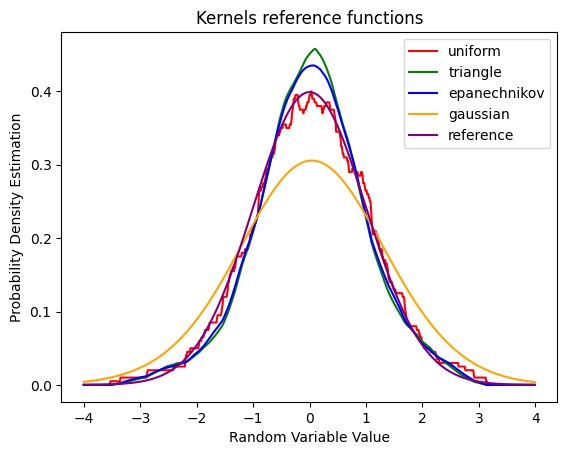

In [79]:

#Question 6
#Repeat the previous question with h = 1. Qualitatively, does the es-
#timate differ more when varying the kernel used or the window h used?
#The new function for this question will be named Allplotfchapeauh1.

def Allplotfhath1(xmin,xmax,step,col1,col2,col3,col4,colref,realization=X,title='Kernels reference functions'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['uniform', 'triangle', 'epanechnikov', 'gaussian']
    x = np.arange(xmin, xmax, step)
    for i in range(len(kernels)):
        fhats = [fhat(kernels[i],1,p,realization) for p in x]
        plt.plot(x, fhats, colors[i], label = legends[i])
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.legend()
    plt.xlabel('Random Variable Value')
    plt.ylabel('Probability Density Estimation')
    plt.show()

#P1-LASSOARDILAQ6.png
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple')

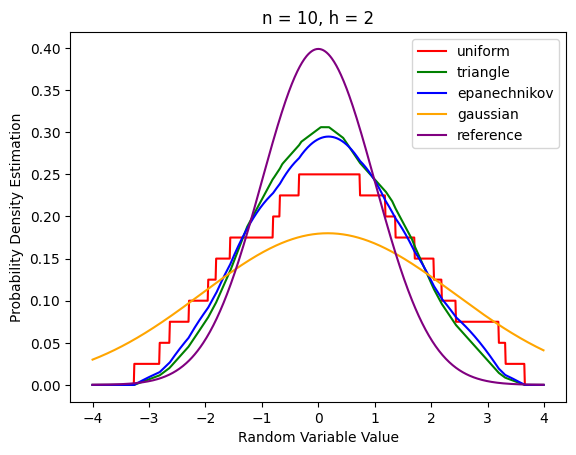

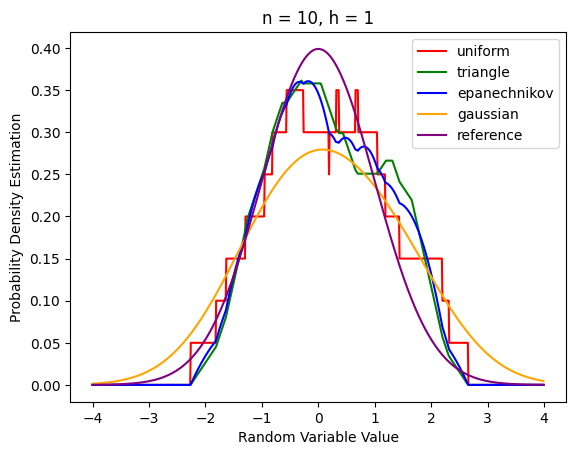

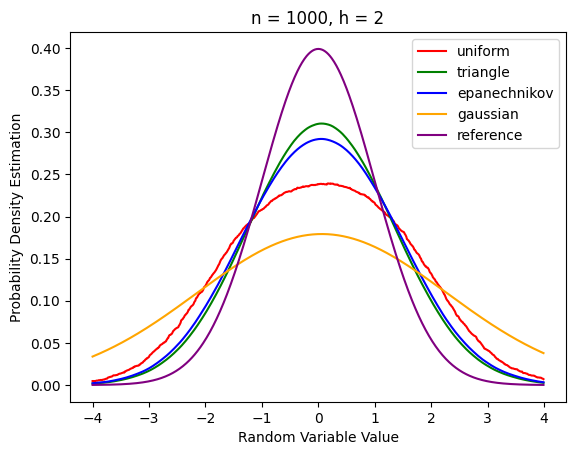

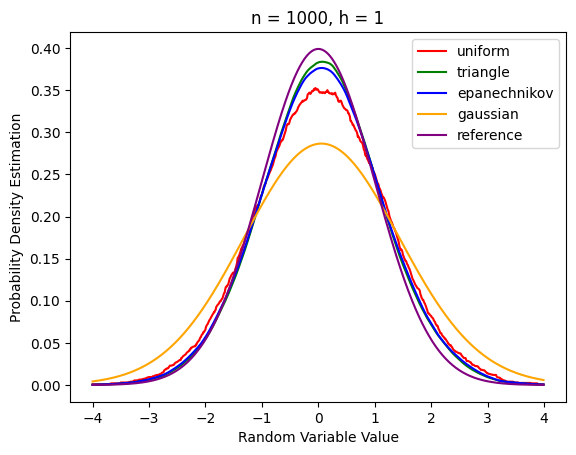

In [80]:
#Question 7


#Repeat the two previous questions for n = 10 then n = 1000. For
#this question, four graphs must be constructed: the first one for (n, h) =
#(10, 2), the second one for (n, h) = (10, 1), the next one for (n, h) =
#(1000, 2) and the last one for (n, h) = (1000, 1). You will detail your
#reasoning in the script and comment on the results obtained. Return to
#the value of n = 100 in the script for the rest of the exercise.


#We define the realization of the random sample X according to the standard gaussian distribution of size n
#with n = 10 and n = 1000

n10 = np.random.normal(0,1,10)
n1000 = np.random.normal(0,1,1000)



#We need to make four graphs. One using Allplotfhath1 and the other using Allplotfhath2
#each one on a different sample n10 and n1000. We will use the same colors for each
#kernel in each graph, so that we can compare them easily. And give a title to each graph
#like this: "n = 100, h = 2" For example

#P1-LASSOARDILAQ7a.png
Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple',realization=n10, title='n = 10, h = 2')

#P1-LASSOARDILAQ7b.png
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple',realization=n10, title='n = 10, h = 1')

#P1-LASSOARDILAQ7c.png
Allplotfhath2(-4,4,0.01,'r','g','b','orange','purple',realization=n1000, title='n = 1000, h = 2')

#P1-LASSOARDILAQ7d.png
Allplotfhath1(-4,4,0.01,'r','g','b','orange','purple',realization=n1000, title='n = 1000, h = 1')




Increasing the number of samples **n** will generally improve the accuracy of the density estimate, as more data will be available for the estimation algorithm to work with. This will help to reduce the impact of sampling variability and produce a more accurate representation of the underlying distribution.

Decreasing the window size **h** for density estimation can have different effects depending on the specific density estimation method being used. In general, reducing the window size will increase the resolution of the estimate, as the density estimate will be calculated based on smaller intervals

For kernel density estimation, decreasing the window size will result in a narrower kernel and a more peaked estimate, since the kernel will have less influence over a smaller range of values. This can be useful for identifying localized features or peaks in the data, but may result in oversmoothing of the data if the window size is too small. We can see in the example above that when n increases, the kernels esimation are closer to the reference, and when h decreases, the kernels are more peaker and 'smoother'.

In [81]:

#Question 8

#We will compute the squared error of an estimate
#Define a function SCE that takes a function (the considered kernel), the
#window h, the reference density f as parameters and returns SCE(h).


def SCE(kernel,h,f):
    """
    kernel: kernel function
    h: window size
    f: reference function
    """
    sample = np.random.normal(0,1,500)
    x = np.arange(-5, 5, 0.02)

    #fhat vector
    fhats = [fhat(kernel,h,p,sample) for p in x]

    #reference vector
    ref = [f(p) for p in x]

    #SCE vector
    SCEvec = sum([(fhats[i] - ref[i])**2 for i in range(len(x))])
    return SCEvec

print('Testing...')
print(['uniform', 'triangle', 'epanechnikov', 'gaussian'])
for i,kernel in enumerate([K1, K2, K3, K4]):
    print("K"+str(i+1)+":" ,SCE(kernel,2,reference))

Testing...
['uniform', 'triangle', 'epanechnikov', 'gaussian']
K1: 1.9923603448595566
K2: 0.6695288038079169
K3: 1.0055614574011513
K4: 4.093605523597543


In [82]:
#Question 9

#Define a function thebesth which takes a function (the kernel in question)
#and another function f (the reference) as parameters and returns the index
#divided by 100 of the minimum of the list {SCE(k/100)}1≤k≤200. For each
#kernel, the best window for the estimation of the reference function is given
#by this function.

def thebesth(kernel,f,):
    #Add documentation describing input and output
    """
    kernel: kernel function
    f: reference function
    """
    #Create a list of the SCE values for each h
    h_candidates = []
    for i in range(1,201):
        h_candidates.append(SCE(kernel,i/100,f))

    #Find the index of the minimum value in the list
    min_index = h_candidates.index(min(h_candidates))
    return min_index/100

thebesth(K2,reference)

0.68

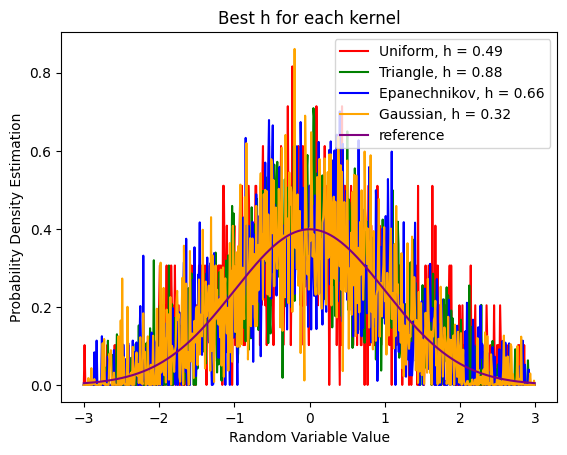

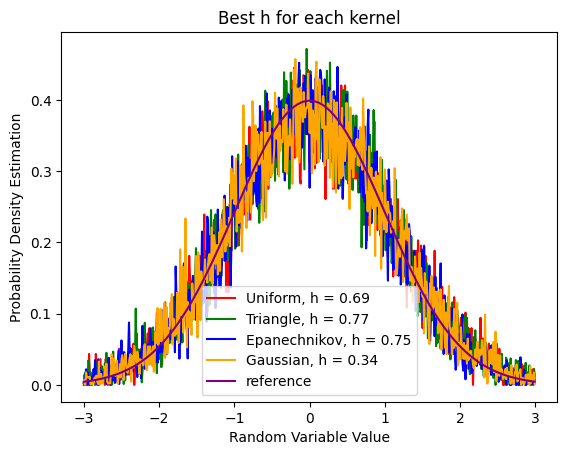

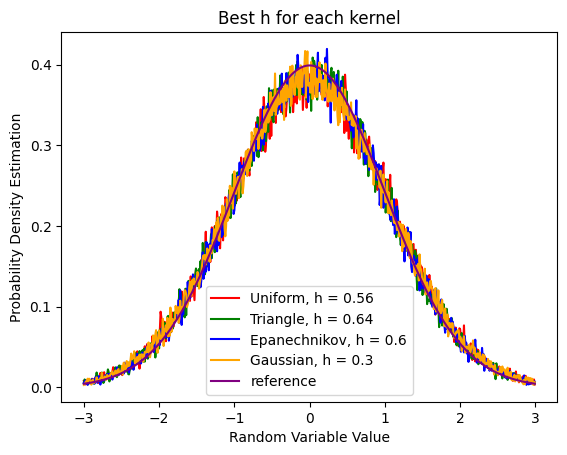

In [83]:
#Question 10

#Define then a function which represents graphically the four density esti-
#mates for these four kernels with the windows obtained via the function
#thebesth. To do this, define the function Allplotfhathoptimal

#We can see the optiomal h for each kernel on the graph legends.

def Allplotfhathoptimal(xmin,xmax,step,col1,col2,col3,col4,colref,samplesize=1000,title='Best h for each kernel'):
    """
    xmin: minimum value of x
    xmax: maximum value of x
    step: step between each point
    colors: list of colors for each kernel
    """
    plt.title(title)
    colors = [col1, col2, col3, col4]
    kernels = [K1, K2, K3, K4]
    legends=['Uniform', 'Triangle', 'Epanechnikov', 'Gaussian']
    x = np.arange(xmin, xmax, step)
    besth = [thebesth(kernel,reference) for kernel in kernels]
    for i in range(len(kernels)):
        x = np.arange(xmin, xmax, step)
        fhats = [fhat(kernels[i],besth[i],p,np.random.normal(0,1,samplesize)) for p in x]
        plt.plot(x, fhats, colors[i], label = (legends[i]+", h = "+str(besth[i])))
    plt.plot(x, reference(x), colref, label = 'reference')
    plt.xlabel('Random Variable Value')
    plt.ylabel('Probability Density Estimation')
    plt.legend()
    plt.show()


for samplesize in [10,100,1000]:
    display(HTML('<h1>'+'Sample size =  '+ str(samplesize) +'</h1>'))
    Allplotfhathoptimal(-3,3,0.01,'r','g','b','orange','purple',samplesize=samplesize)
    print('')


 We can see that the optimal window size does not produce a curve that is too smooth, but not too erratic either. This, the larger the sample size, gets closer and closer to the reference curve.



 <b>
 <b>

## Session work with Python : part 2

In [84]:

#We are now going to exploit the functionalities of scikit-learn. The func-
#tion densite estimation present in the script is used to carry out a density
#estimation by Gaussian kernel (kernel=′gaussian′) with for window h whose
#reference density is a Gaussian mixture (of two Gaussians of means mu1, mu2
#and of deviations sigma1, sigma2). This function uses the scikit-learn package.

def density_estimation(N,h,mu1,sigma1,mu2,sigma2,kerneltype='gaussian'):
        # generate the sample from two normal distributions
     
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # prepare the points where we will calculate the density
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # prepare to display the true density, which is the one from
         # from which the data was generated (see above)
         # the weighting of the distributions in the sum is the weighting of the distributions
         # in generated sample (see above)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # density estimation by Gaussian kernels
        kde = KernelDensity(kernel=kerneltype, bandwidth=h).fit(X)   


        # density calculation for X_plot data
        density = np.exp(kde.score_samples(X_plot))

        # display: true density and estimate
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Real Density')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()



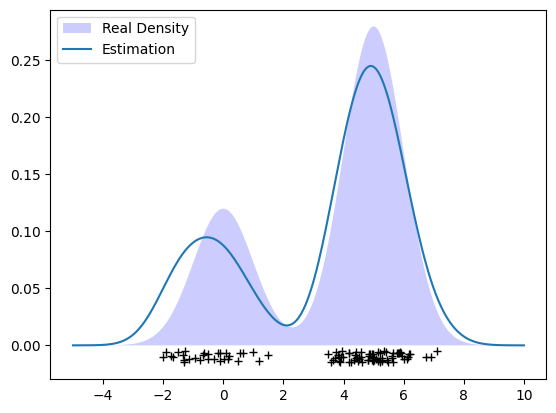

In [85]:

#Question 1

#We define the parameters of the problem and we call the function density
#estimation.

mu1 = 0
mu2 = 5
sigma1 = sigma2 = 1
N = 100
h = 0.75



#P2-LASSOARDILAQ1.png
density_estimation(N,h,mu1,sigma1,mu2,sigma2)

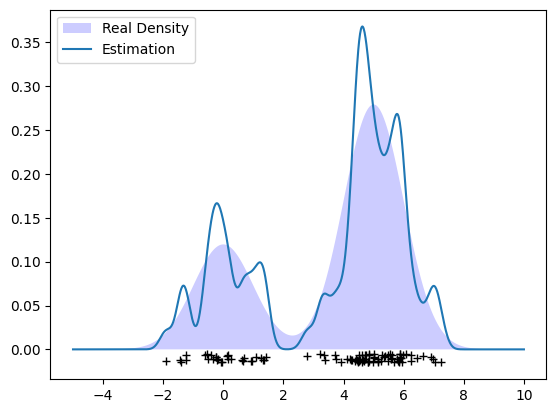

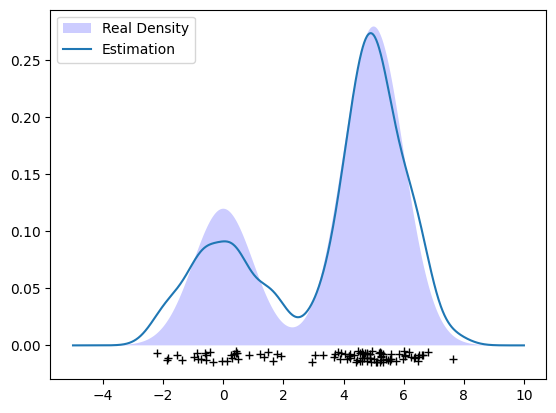

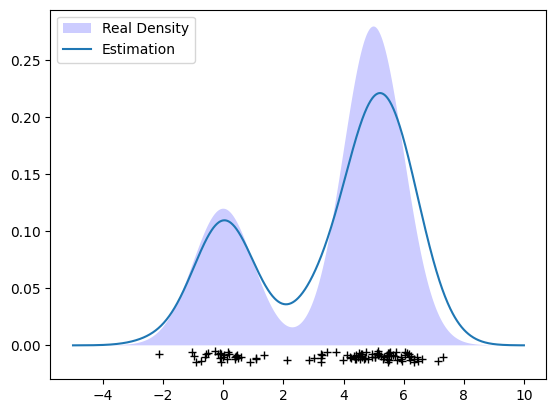

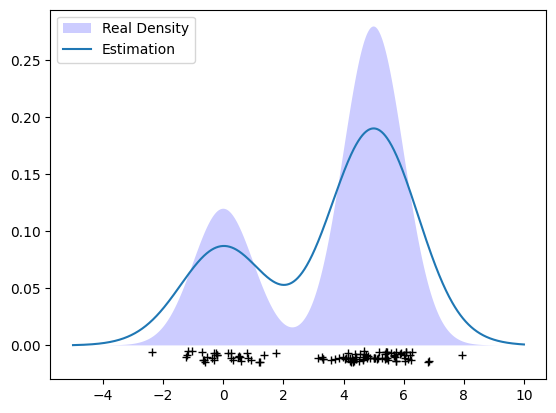

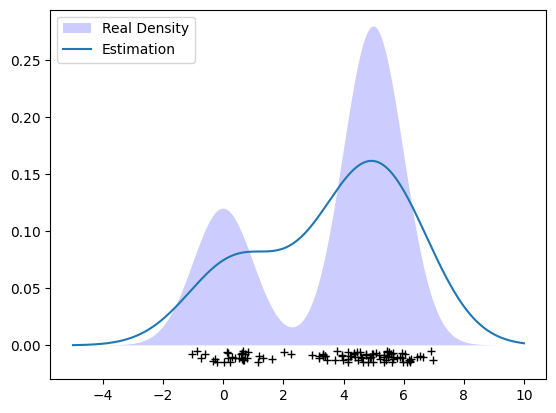

In [86]:

#Question 2

#Compare the influence of the window h to any other parameter fixed as
#in the previous question. We can test values of h between 0.2 and 1.5.
#Comment on this.

hs = np.arange(0.2, 1.5, 0.3)
hs

for h in hs:
    display(HTML('<h1>'+'h =  '+ str(h) +'</h1>'))
    density_estimation(N,h,mu1,sigma1,mu2,sigma2)
    print('')


As we saw in the first part, the larger the window size h increases, the smoother the estimation curve will be, and the smaller it is, the more erratically it will behave. It is necessary to find a balance between these two variables, and we already did that too, looking for a wind size that would reduce the SCE.

In this specific case, we see that when h increases, the estimate is smoother, but it becomes increasingly different from the real density.

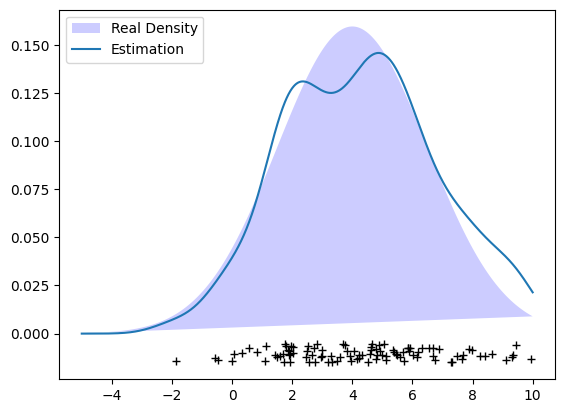

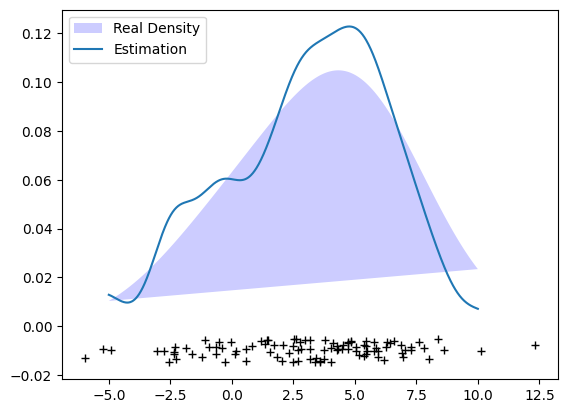

In [87]:
#Question 3

#Vary the parameters of the two Gaussian distributions that define the
#Gaussian mixture. Comment.

#These values stays the same as in the previous question
N = 100
h = 0.75



parameters = [
    [4, 4, 2.5, 2.5, "Same Parameters"], #Same parameters
    [0, 5, 3, 3, "High variance distributions away from the other"]] #High variance distributions away from the other


for param in parameters:
    mu1 = param[0]
    mu2 = param[1]
    sigma1 = param[2]
    sigma2 = param[3]

    display(HTML('<h1> '+param[4]+' </h1>'))
    density_estimation(N,h,mu1,sigma1,mu2,sigma2)

We can see that for two distributions that overlap and for two distributions that are alienated from each other, but with a high variance, the kernel estimate is more accurate than the histogram estimate. This is because the kernel is more flexible and can better adjust to the distribution of the data.

  <b>
  <b>

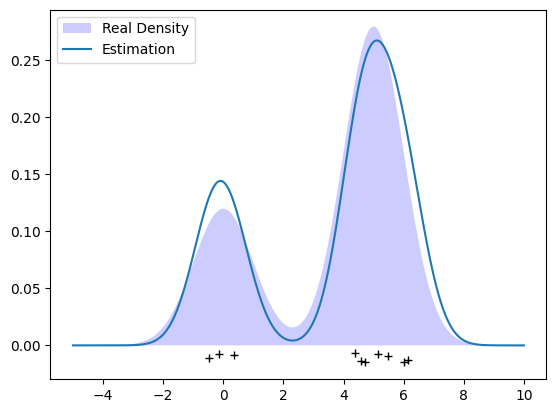

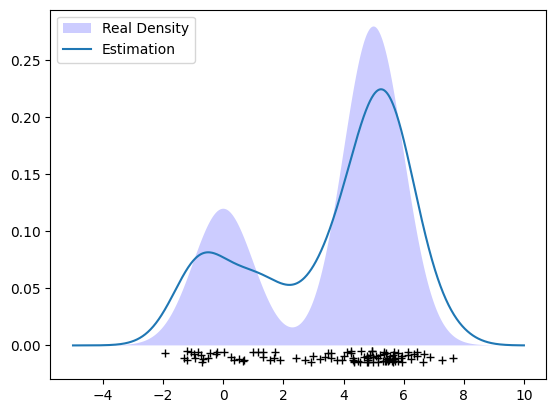

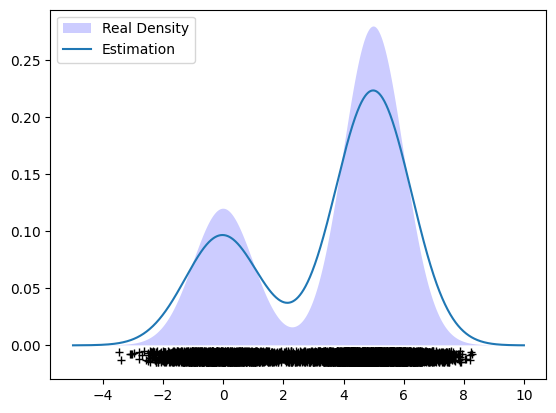

In [88]:
#Question 4

#Vary the number of points N. Comment.

samplesizes = [10, 100, 10000]

mu1 = 0
mu2 = 5
sigma1 = sigma2 = 1
h = 0.75


for N in samplesizes:
    display(HTML('<h1>'+'N =  '+ str(N) +'</h1>'))
    density_estimation(N,h,mu1,sigma1,mu2,sigma2)
    print('')

When trying to estimate a distribution composed of two Gaussians, the kernel is able to fit even with only a few data points. By increasing N, the kernel better fits the actual distribution and is able to make a better prediction.
  <b>
  <b>

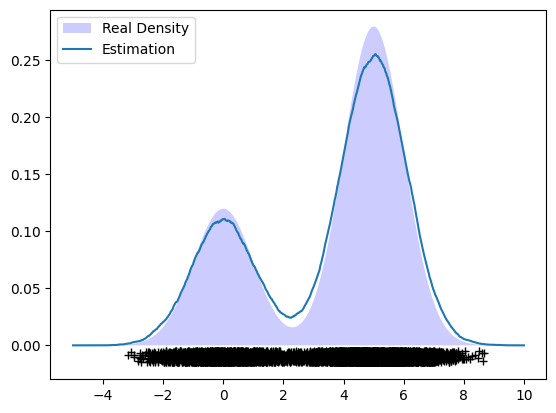

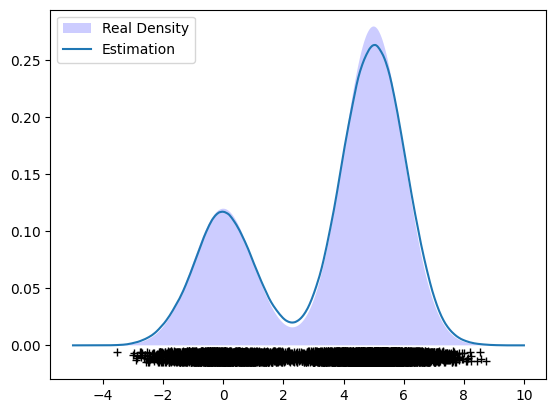

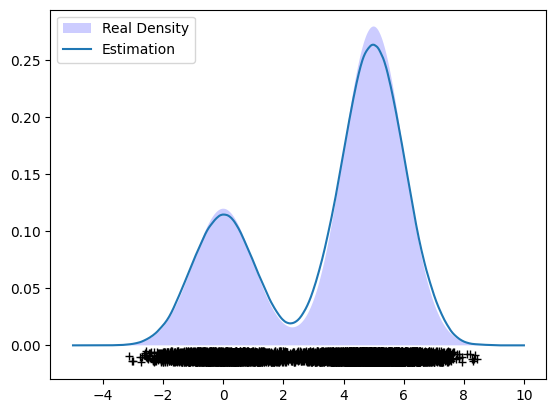

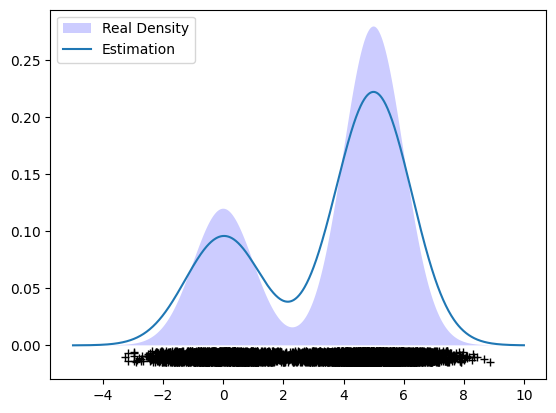

In [89]:

#Question 5

#One can also test other kernels for example by replacing ’gaussian’ in
#the code by ’epanechnikov ’. Realize this graph by executing the function
#estimationdensite2 with the same parameters as in question 1

#Tophat: Uniform kernel
#Linear: Triangle kernel
#Epanechnikov: Epanechnikov kernel
#Gaussian: Gaussian kernel


kernels = ['Tophat','Linear','Epanechnikov','Gaussian']



#P2-LASSOARDILAQ5.png

for kernel in kernels:
    display(HTML('<h1>'+kernel+' kernel </h1>'))
    density_estimation(N,0.75,mu1,sigma1,mu2,sigma2,kerneltype=kernel.lower())
    print('')



With this function we can analyze not only the epanechnikov kernel, but also the gaussian, tophat, linear and gaussian kernels. At first glance we can see graphs very similar to those we obtained in question 2 of the first part. In that part we saw that the Gaussian kernel gave the biggest error and was the worst fit to the reference. Now the opposite happens, the Gaussian kernel fits the data very well and Epanechnikov's does not. The Epanechnikov kernel may perform poorly for a distribution composed of two Gaussian distributions because it is sensitive to the tails of the distribution and tends to produce a unimodal estimate.
 